Step counter from accelerometer data

In [105]:
import os
import glob
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
import datetime
import scipy as sp
from scipy.signal import butter, lfilter, freqs
import pandas as pd
from scipy.signal import find_peaks
data_file_path = ""

csv_files = glob.glob('*.csv')
data = dict() #plain python dictonary  to contain list of 3 axis list
pdata = dict() #dict of numpy arrays


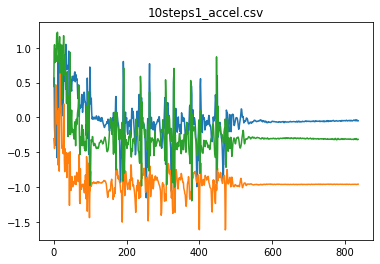

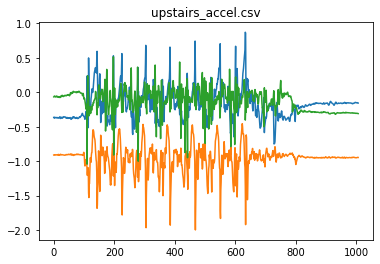

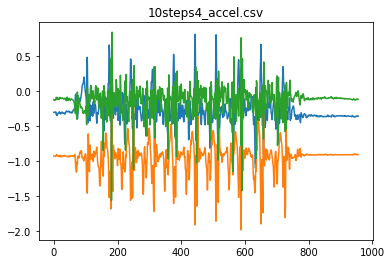

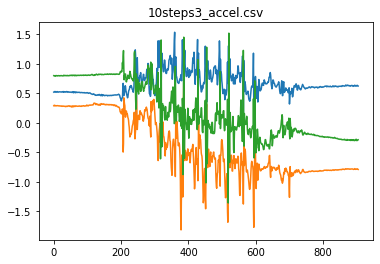

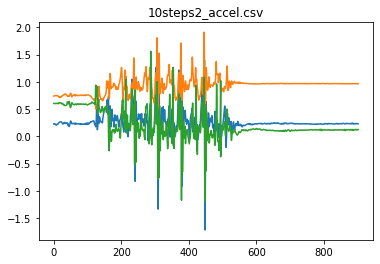

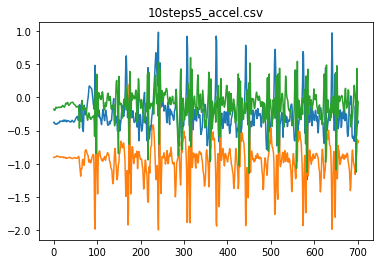

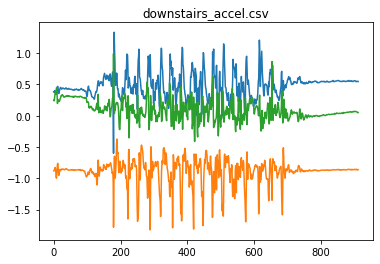

In [106]:

for data_file_path in csv_files:
    data[data_file_path] = []
    with open(data_file_path, 'r') as f:
        reader = csv.reader(f, delimiter=',')
        for row in reader: #skip timestamp field
            data[data_file_path].append([float(row[1]),float(row[2]),float(row[3])]) 
            
    pdata[data_file_path] = np.array(data[data_file_path])        
    plt.plot(pdata[data_file_path])
    plt.title(data_file_path)
    plt.show()  
    


In [107]:
mag=dict()
for data_file_path in csv_files:
    mag[data_file_path]=[]
    for ax in pdata[data_file_path]:
        mag[data_file_path].append(math.sqrt(np.sum(ax*ax)))


In [108]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [109]:
cutOff = .3 #cutoff frequency in rad/s
fs = 10 #sampling frequency in rad/s
order = 10 #order of filter

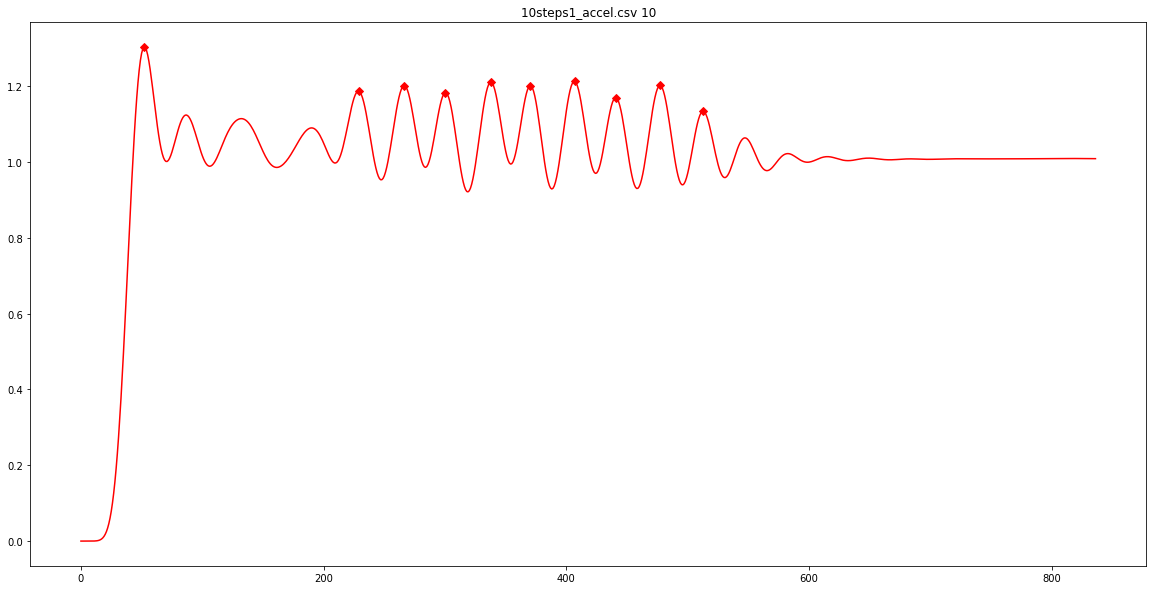

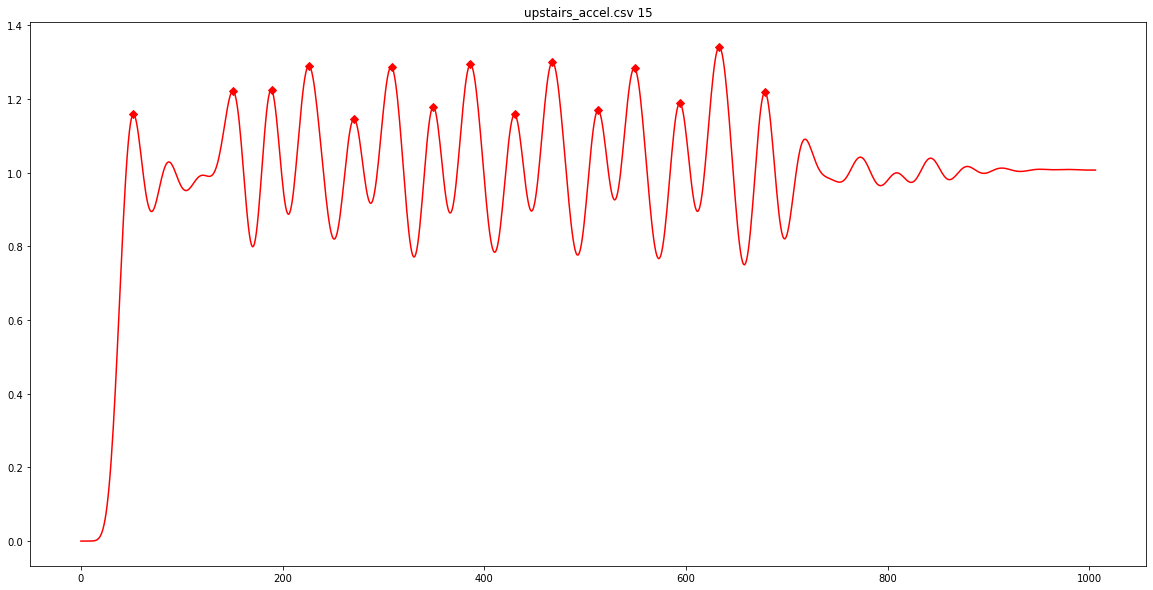

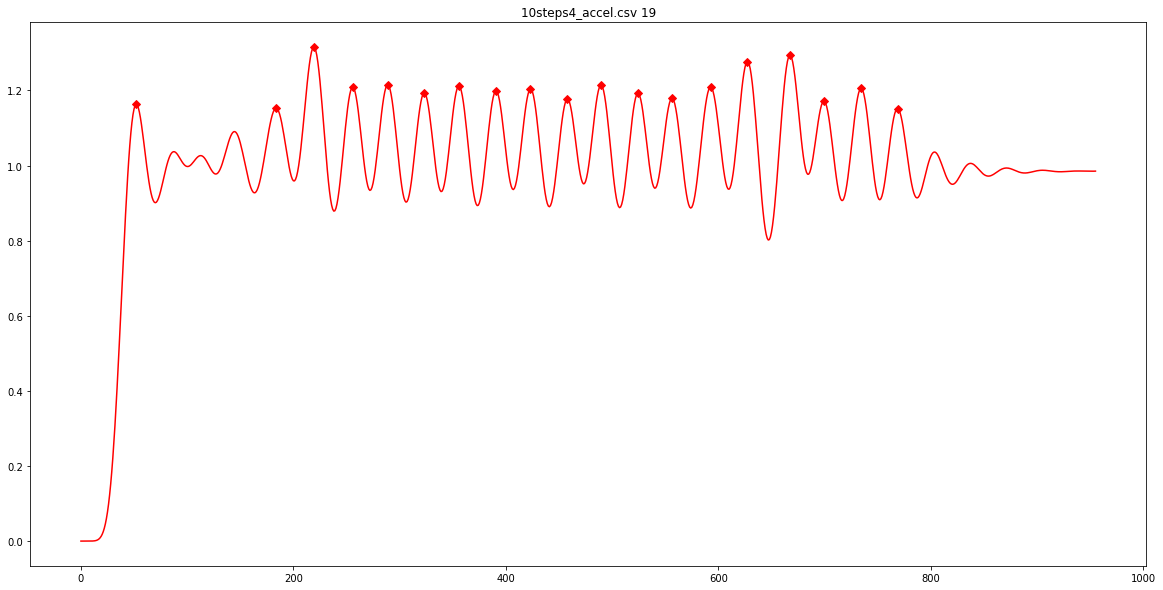

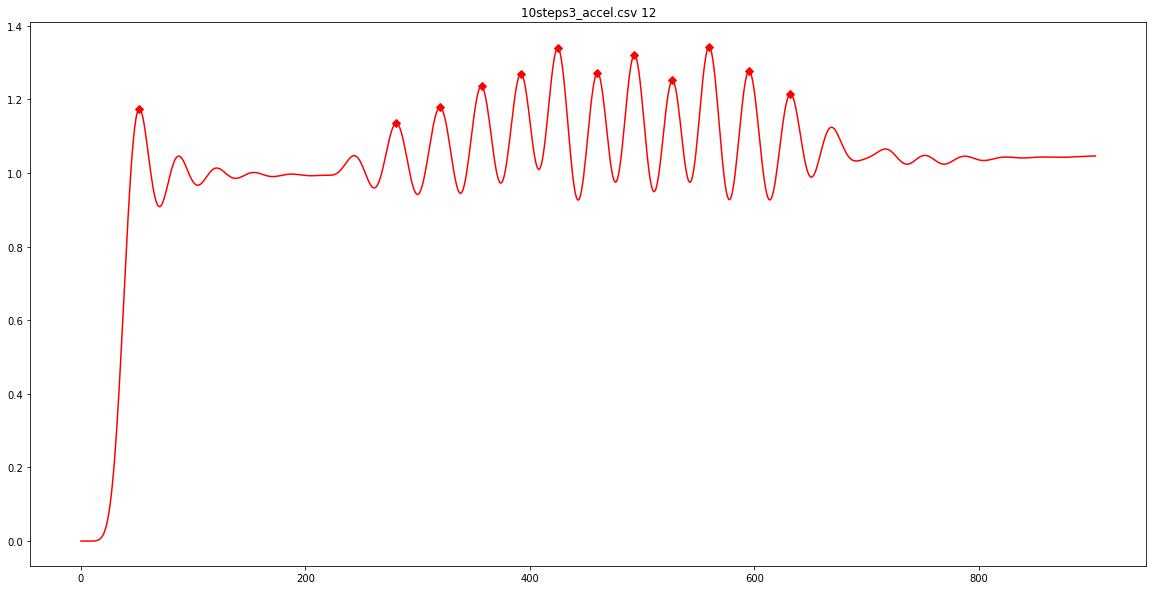

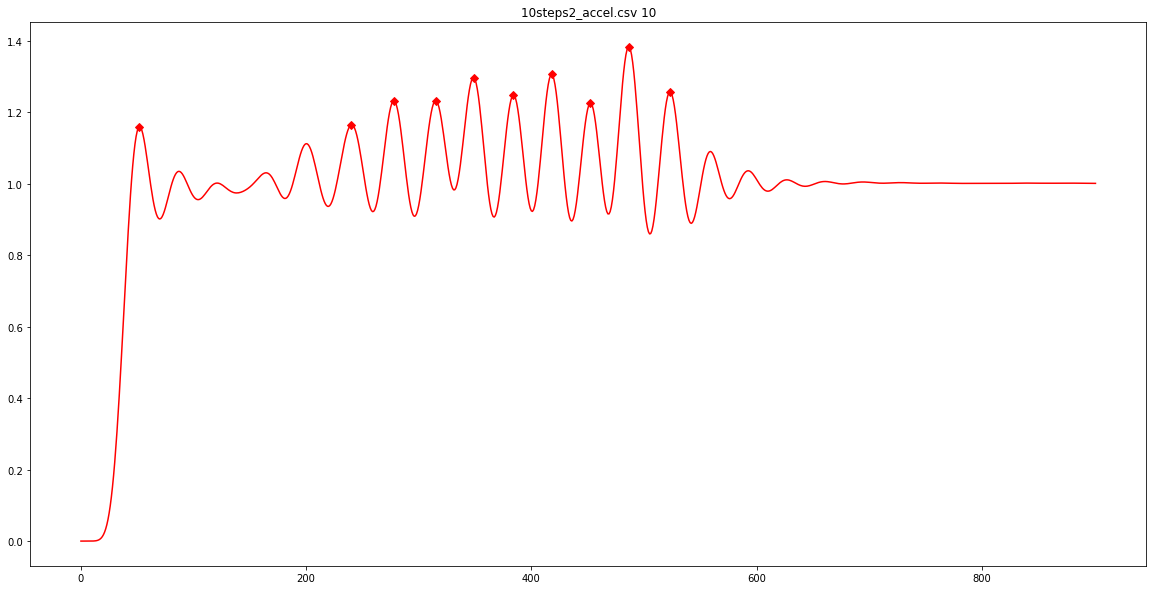

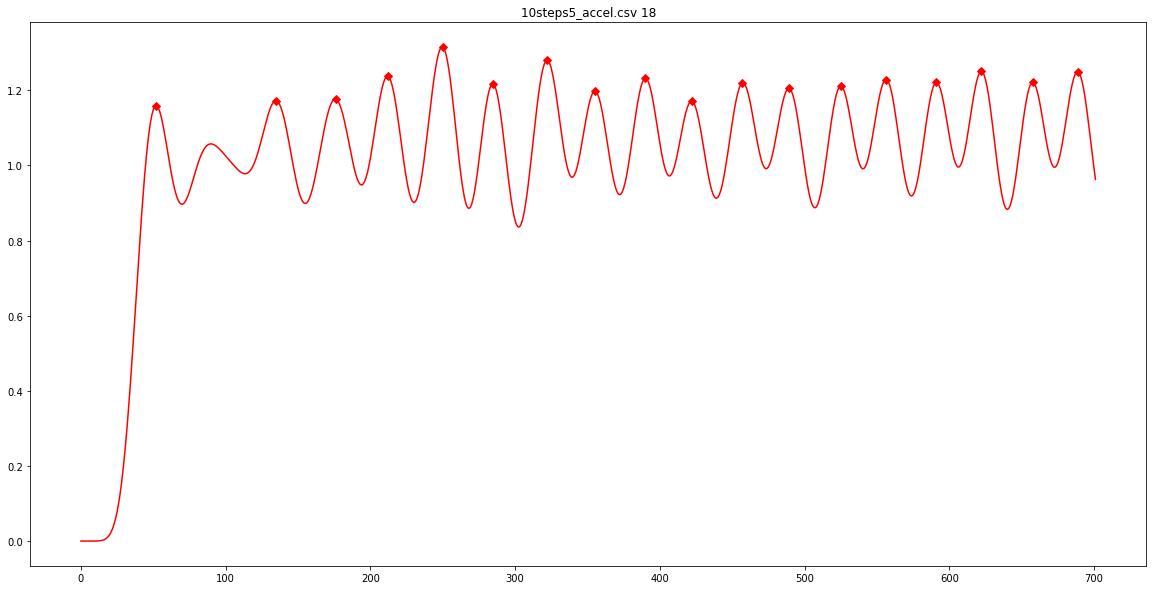

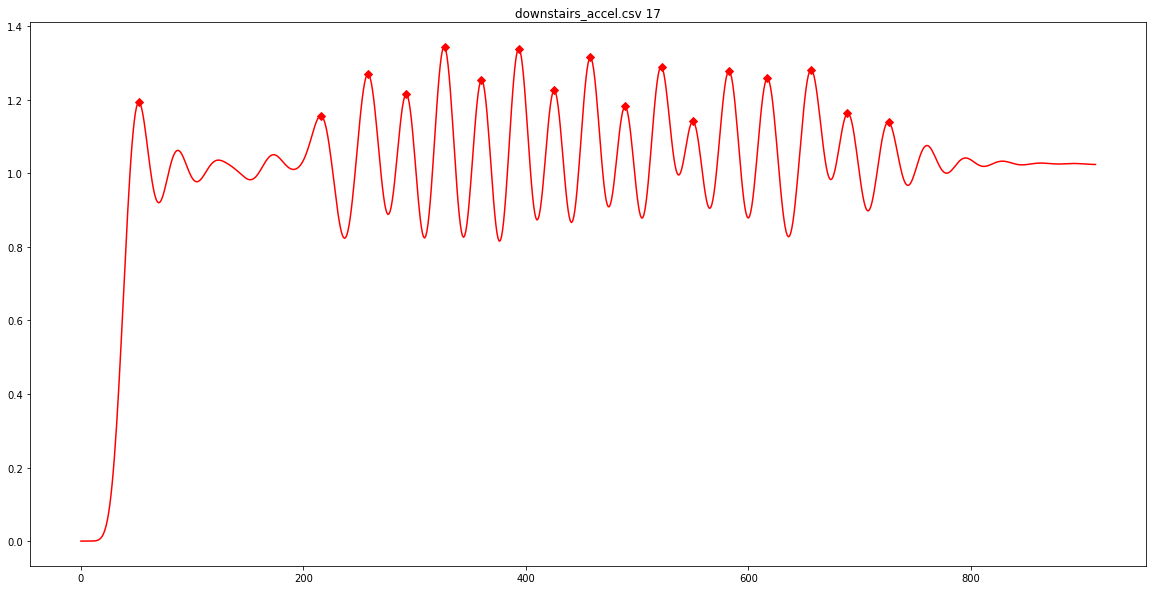

In [115]:
for data_file_path in csv_files:
    y = butter_lowpass_filter((mag[data_file_path]), cutOff, fs, order)
    indices = find_peaks(y,height=1.125)[0]
    plt.figure(figsize=(20,10))
    plt.plot(y,'-rD',markevery= list(indices))
    plt.title(data_file_path+ ' '+ str(len(indices)))
    plt.show()  

In [111]:
peakind

array([ 49, 121, 173, 258, 259, 327, 394, 458, 521, 583, 618, 656, 828,
       862, 894, 909])